In [ ]:
#téléchargement des données et analyse descriptive
#aller sur https://files.data.gouv.fr/geo-dvf/latest/csv/ 
# puis installer 2023, 2024 et 2025 sur 37261 (Insee)
import numpy as np
import pandas as pd
df_2023=pd.read_csv('datatours2023.csv')
df_2024=pd.read_csv('datatours2024.csv')
df_2025=pd.read_csv('datatours2025.csv')
df_2023.describe()

,numero_disposition,valeur_fonciere,adresse_numero,code_postal,code_commune,code_departement,ancien_code_commune,ancien_nom_commune,ancien_id_parcelle,numero_volume,...,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
count,7524.000000,7.474000e+03,6837.000000,7384.000000,7524.0,7524.0,0.0,0.0,0.0,60.000000,...,29.000000,73.000000,5.000000,7524.000000,6562.000000,3370.000000,6559.000000,2008.000000,7349.000000,7349.000000
mean,1.180489,4.723469e+05,212.825216,37076.313651,37261.0,37.0,NaN,NaN,NaN,344.533333,...,51.060690,24.356164,56.386000,0.914274,2.495733,73.856083,1.397774,2435.244024,0.691376,47.389531
std,0.396196,8.954407e+05,1249.154758,80.452514,0.0,0.0,NaN,NaN,NaN,1706.109962,...,23.613369,44.328436,33.781321,1.054018,0.718003,167.466073,1.813894,15799.599891,0.010181,0.021137
min,1.000000,1.000000e+00,1.000000,37000.000000,37261.0,37.0,NaN,NaN,NaN,1.000000,...,26.650000,3.000000,25.880000,0.000000,1.000000,5.000000,0.000000,1.000000,0.657299,47.351060
25%,1.000000,1.300000e+05,5.000000,37000.000000,37261.0,37.0,NaN,NaN,NaN,4.750000,...,36.430000,7.000000,25.880000,0.000000,2.000000,38.000000,0.000000,117.000000,0.683392,47.374492
50%,1.000000,2.070000e+05,16.000000,37100.000000,37261.0,37.0,NaN,NaN,NaN,14.500000,...,45.200000,14.000000,61.110000,1.000000,3.000000,62.000000,0.000000,239.000000,0.694068,47.387860
75%,1.000000,4.650000e+05,44.000000,37100.000000,37261.0,37.0,NaN,NaN,NaN,23.000000,...,61.250000,22.000000,61.110000,1.000000,3.000000,80.000000,3.000000,751.000000,0.697300,47.408040
max,5.000000,1.082112e+07,9100.000000,37200.000000,37261.0,37.0,NaN,NaN,NaN,13002.000000,...,112.480000,255.000000,107.950000,26.000000,4.000000,5579.000000,10.000000,161308.000000,0.723032,47.438743


In [82]:
#concaténation des données
df_tours=pd.concat([df_2023,df_2024,df_2025],ignore_index=True)
df_tours.head(2)

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2023-502344,2023-01-03,1,Vente,100600.0,1.0,NaN,ALL VINCENT SCOTTO,4984,37100.0,...,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.67989,47.408701
1,2023-502344,2023-01-03,1,Vente,100600.0,3.0,NaN,ALL VINCENT SCOTTO,4984,37100.0,...,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.67989,47.408701


In [95]:
#colonnes d'intérêt sans NaN et sans valeurs abérantes (filtration des données inutiles) 
import numpy as np
df1=df_tours[['id_mutation','date_mutation','nature_mutation','valeur_fonciere','type_local','surface_reelle_bati','nombre_pieces_principales','code_postal','longitude','latitude','adresse_numero','adresse_suffixe','adresse_nom_voie','code_commune','nom_commune']]
df=df1[(df1['nature_mutation']=='Vente') & (df1['type_local']=='Appartement')]
df=df.dropna(subset=['valeur_fonciere','surface_reelle_bati','nombre_pieces_principales','longitude','latitude'])
df['prix_m2']=df['valeur_fonciere']/df['surface_reelle_bati']
df=df[(df['valeur_fonciere']>40000) & (df['prix_m2']>1500) & (df['surface_reelle_bati']>13) & (df['nombre_pieces_principales']>0) & (df['prix_m2']<5500) & (df['surface_reelle_bati']<175) & (df['nombre_pieces_principales']<7) & (df['valeur_fonciere']<500000)]

df=df.dropna(subset=['valeur_fonciere','surface_reelle_bati','nombre_pieces_principales','longitude','latitude'])
df['distance_centre']=np.sqrt((df['longitude']-0.6848)**2+(df['latitude']-47.3941)**2)*111000 #distance en mètres le fois 111000 (approximation) c'est 111 km par degré
df.describe() #il y a 3457 appartements après filtrage

,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,code_postal,longitude,latitude,adresse_numero,code_commune,prix_m2,distance_centre
count,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.000000,3457.0,3457.000000,3457.000000
mean,156088.264223,54.583165,2.471218,37048.973098,0.690011,47.393037,44.501302,37261.0,2968.463948,2052.585033
std,77301.415004,24.579368,1.144303,65.878269,0.010830,0.016954,59.198002,0.0,812.482342,1058.736168
min,40910.000000,14.000000,1.000000,37000.000000,0.666936,47.351716,1.000000,37261.0,1507.936508,93.195722
25%,104900.000000,37.000000,2.000000,37000.000000,0.681155,47.381453,7.000000,37261.0,2349.397590,1281.224240
50%,140000.000000,51.000000,2.000000,37000.000000,0.689535,47.390160,20.000000,37261.0,2942.857143,1907.802140
75%,187980.270000,70.000000,3.000000,37100.000000,0.697809,47.408040,58.000000,37261.0,3497.727273,2843.906409
max,499600.000000,153.000000,6.000000,37200.000000,0.721948,47.435628,472.000000,37261.0,5477.736889,5173.432701


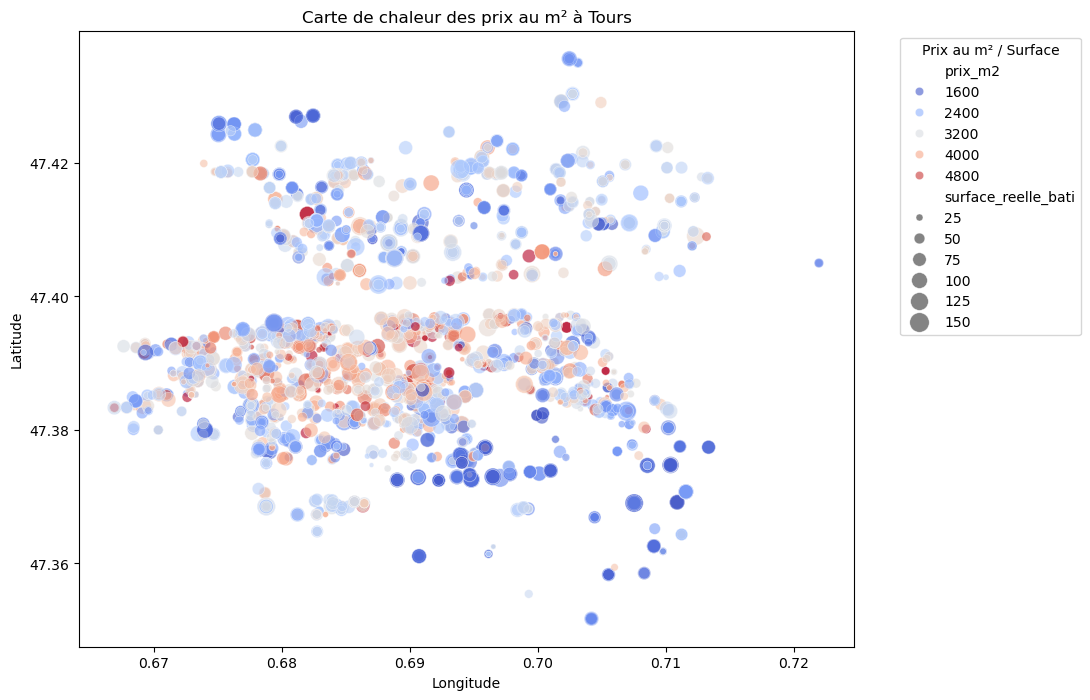

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
# On utilise la palette 'Spectral_r' : Rouge = Cher, Bleu = Abordable
sns.scatterplot(data=df, x='longitude', y='latitude', hue='prix_m2',hue_norm=(1500, 5000),
                palette='coolwarm', size='surface_reelle_bati', 
                sizes=(10, 200), alpha=0.6)

plt.title('Carte de chaleur des prix au m² à Tours')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Prix au m² / Surface', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Text(0.5, 1.0, 'Distribution des prix au mètre carré des appartements à Tours (2023-2025)')

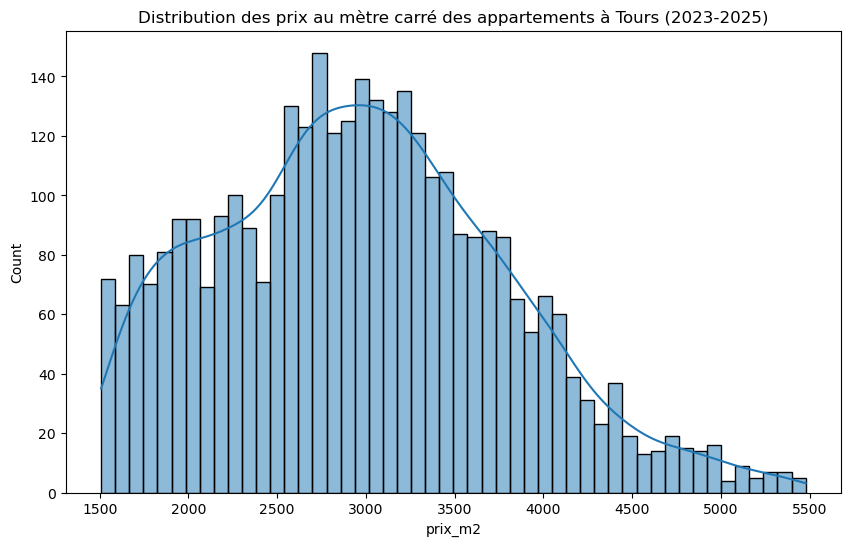

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(df['prix_m2'], bins=50, kde=True)
plt.title('Distribution des prix au mètre carré des appartements à Tours (2023-2025)')

Text(0.5, 1.0, 'Prix au mètre carré en fonction du nombre de pièces principales')

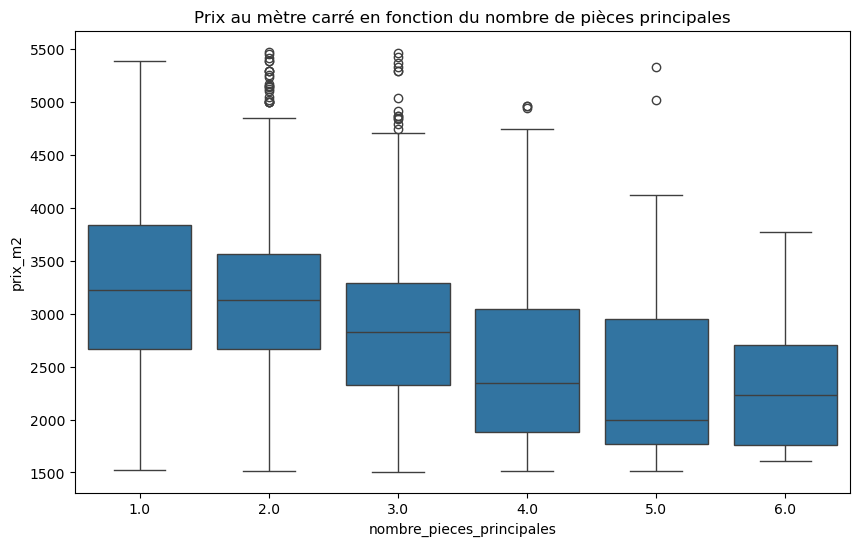

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
#visualisation des prix au m2
plt.figure(figsize=(10,6))
sns.boxplot(x='nombre_pieces_principales', y='prix_m2', data=df)
plt.title('Prix au mètre carré en fonction du nombre de pièces principales')

In [66]:
import folium
#fait avec l'IA uniquement
# On crée la carte centrée sur Tours
carte_tours = folium.Map(location=[47.3941, 0.6848], zoom_start=13)

# On ajoute quelques points (pour ne pas faire ramer la carte, on en prend 500 au hasard)
for i, row in df.sample(500).iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        popup=f"Prix: {row['valeur_fonciere']}€ | {row['surface_reelle_bati']}m²",
        color='red' if row['prix_m2'] > 3500 else 'blue',
        fill=True
    ).add_to(carte_tours)

carte_tours.save("carte_interactive_tours.html")
print("Carte sauvegardée ! Ouvre le fichier 'carte_interactive_tours.html' dans ton dossier.")

Carte sauvegardée ! Ouvre le fichier 'carte_interactive_tours.html' dans ton dossier.


In [ ]:
#modèle de machine learning pour prédire la valeur foncière 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Creation de X Y
dfml = df[['surface_reelle_bati', 'nombre_pieces_principales', 'longitude', 'latitude', 'date_mutation', 'valeur_fonciere', 'distance_centre']].copy()
dfml['date_mutation'] = pd.to_datetime(df['date_mutation'])
dfml['date_num'] = dfml['date_mutation'].apply(lambda x: x.toordinal())
date_ref = dfml['date_num'].min()
dfml['date_score'] = dfml['date_num'] - date_ref
#filtration plus séléctive afin d'améliorer le modèle
#dfml = dfml[(dfml['prix_m2']>1900) & (dfml['prix_m2']<5000)]

X = dfml[['surface_reelle_bati', 'nombre_pieces_principales', 'longitude', 'latitude', 'date_score', 'distance_centre']]
y = dfml['valeur_fonciere']

# 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#orienté objet
modele_v1 = LinearRegression() #création
modele_v1.fit(X_train, y_train) #entraînement
print(modele_v1.score(X_test, y_test)) #évaluation
print(modele_v1.coef_) #coefficients

print("Modèle entraîné avec succès !") # grâce à distance au centre j'ai gagné environ 4% de score(63% --> 67%)

2765 692
0.6752199200534119
[ 3.13589962e+03 -1.34897989e+04  5.54928914e+04  3.05224293e+05
 -1.22595416e+01 -1.71549641e+01]
Modèle entraîné avec succès !


In [127]:
#modèle de machine learning pour prédire le prix au m2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Creation de X Y
dfml1 = df[['surface_reelle_bati', 'nombre_pieces_principales', 'longitude', 'latitude', 'date_mutation', 'valeur_fonciere', 'distance_centre','prix_m2']].copy()
dfml1['date_mutation'] = pd.to_datetime(df['date_mutation'])
dfml1['date_num'] = dfml1['date_mutation'].apply(lambda x: x.toordinal())
date_ref = dfml1['date_num'].min()
dfml1['date_score'] = dfml1['date_num'] - date_ref
#filtration plus séléctive afin d'améliorer le modèle
dfml1 = dfml1[(dfml1['prix_m2']>1900) & (dfml1['prix_m2']<5000)]

X1 = dfml1[['surface_reelle_bati', 'nombre_pieces_principales', 'longitude', 'latitude', 'date_score', 'distance_centre']]
y1 = dfml1['prix_m2']

# 80/20
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
#orienté objet
modele_v2 = LinearRegression() #création
modele_v2.fit(X1_train, y1_train) #entraînement
print(modele_v2.score(X1_test, y1_test)) #évaluation

print("Modèle entraîné avec succès !\n le R² est bas mais c'est mieux que rien, plus on verra après que l'erreur au m² n'est pas énorme.") # grâce à distance au centre j'ai gagné environ 4% de score(63% --> 67%)

0.20159907265185562
Modèle entraîné avec succès !
 le R² est bas mais c'est mieux que rien, plus on verra après que l'erreur au m² n'est pas énorme.


In [128]:
#estimation de l'erreur moyenne en euros    
from sklearn.metrics import mean_absolute_error
y_pred = modele_v1.predict(X_test)
erreurmoyenne = mean_absolute_error(y_test, y_pred)   
print(f"Erreur moyenne en euros : {erreurmoyenne:.2f} €")

y1_pred = modele_v2.predict(X1_test)
erreurmoyenne1 = mean_absolute_error(y1_test, y1_pred)   
print(f"Erreur moyenne en euros au m² : {erreurmoyenne1:.2f} €")

Erreur moyenne en euros : 152720.58 €
Erreur moyenne en euros au m² : 495.53 €


In [116]:
#Création d'un modèle  random forest pour comparer les résultats
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error



dfml2 = df[['surface_reelle_bati', 'nombre_pieces_principales', 'longitude', 'latitude', 'date_mutation', 'valeur_fonciere', 'distance_centre']].copy()

# Date et prix au m²
dfml2['date_mutation'] = pd.to_datetime(dfml2['date_mutation'])
dfml2['date_num'] = dfml2['date_mutation'].apply(lambda x: x.toordinal())
date_ref = dfml2['date_num'].min()
dfml2['date_score'] = dfml2['date_num'] - date_ref
dfml2['prix_m2'] = dfml2['valeur_fonciere'] / dfml2['surface_reelle_bati']

# Filtres
dfml2 = dfml2[(dfml2['prix_m2'] > 1900) & (dfml2['prix_m2'] < 5000)]

# On définit X et Y
X = dfml2[['surface_reelle_bati', 'nombre_pieces_principales', 'longitude', 'latitude', 'date_score', 'distance_centre']]
y = dfml2['prix_m2']

# Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("L'IA réfléchit (création de 100 arbres de décision)...")

# random_state=42 : Pour avoir toujours le même résultat
modele_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modele_rf.fit(X_train, y_train) #entraînement

pred_m2 = modele_rf.predict(X_test)
erreurmoyenne1 = mean_absolute_error(y_test, pred_m2)   
print(f"Erreur moyenne en euros par m² : {erreurmoyenne1:.2f} €")
print(f"le coefficient R² du modèle : {modele_rf.score(X_test, y_test)}") #évaluation

# B. On remultiplie par la surface pour avoir le PRIX TOTAL
surfaces_test = X_test['surface_reelle_bati'] #c'est maintenant une série pandas
prix_total_predit = pred_m2 * surfaces_test #série pandas du prix total prédit par le modèle rf
prix_total_reel = y_test * surfaces_test #série pandas du prix total réel

# C. Calcul de l'erreur
erreur_finale = mean_absolute_error(prix_total_reel, prix_total_predit)

print("-" * 40)
print(f"RÉSULTAT FINAL :")
print(f"L'erreur moyenne avec Random Forest est de : {erreur_finale:.0f} €")
print("-" * 40)

# Comparaison visuelle rapide
comparison = pd.DataFrame({'Réel': prix_total_reel, 'Prédit': prix_total_predit})
comparison['Différence'] = comparison['Prédit'] - comparison['Réel']
print(comparison.head(5))

L'IA réfléchit (création de 100 arbres de décision)...
Erreur moyenne en euros par m² : 401.39 €
le coefficient R² du modèle : 0.4006986195066665
----------------------------------------
RÉSULTAT FINAL :
L'erreur moyenne avec Random Forest est de : 21348 €
----------------------------------------
           Réel         Prédit    Différence
4794    52000.0   53643.038722   1643.038722
2936   157000.0  158532.198166   1532.198166
12280   92760.0   86098.980820  -6661.019180
7882   210000.0  223840.052475  13840.052475
12210   80000.0   75185.026492  -4814.973508


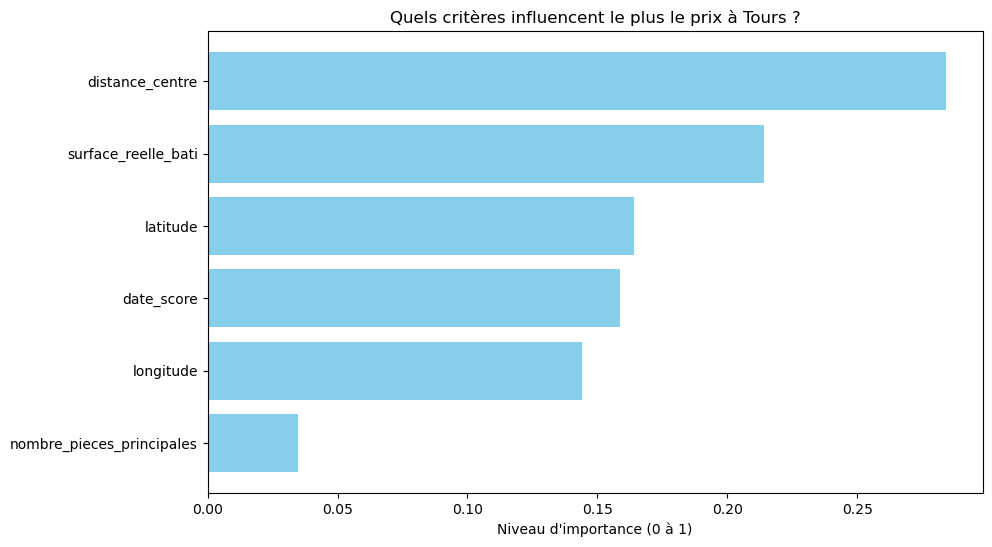

l'adage de l'immobilier 'emplacement, emplacement, emplacement' se confirme 


In [119]:
import matplotlib.pyplot as plt
#fait avec l'IA uniquement
# Extraire l'importance des variables
importances = modele_rf.feature_importances_
features = X.columns

# Créer un DataFrame pour l'affichage
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Graphique
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Niveau d\'importance (0 à 1)')
plt.title('Quels critères influencent le plus le prix à Tours ?')
plt.gca().invert_yaxis() # Pour avoir la plus importante en haut
plt.show()
print("l'adage de l'immobilier 'emplacement, emplacement, emplacement' se confirme ")

In [129]:
#fonction de prédiction finale
import pandas as pd
import numpy as np
def predire_prix(surface, nb_pieces, longitude, latitude, date_mutation):
    date_num = pd.to_datetime(date_mutation).toordinal()
    date_ref = dfml2['date_num'].min()
    date_score = date_num - date_ref
    
    X_nouveau = pd.DataFrame({
        'surface_reelle_bati': [surface],
        'nombre_pieces_principales': [nb_pieces],
        'longitude': [longitude],
        'latitude': [latitude],
        'date_score': [date_score],
        'distance_centre': [np.sqrt((longitude - dfml2['longitude'].mean())**2 + (latitude - dfml2['latitude'].mean())**2) * 111000]
    })
    
    prix_m2_predit = modele_rf.predict(X_nouveau)[0]
    prix_total_predit = prix_m2_predit * surface
    return prix_total_predit, prix_m2_predit
# Exemple d'utilisation
#latitude entre 47.44 et 47.35 et longitude entre 0.66 et 0.73 pour ne pas fausser la prédiction
print(predire_prix(50, 2, 0.7, 47.38, '2024-05-15'))  

(131392.81326580615, 2627.856265316123)


In [133]:
#K-NN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import pandas as pd

# 1. PRÉPARATION (On reprend ta base propre dfml1)
# Assure-toi que dfml1 existe et contient les données filtrées (prix_m2 entre 1900 et 5000)
X = dfml1[['surface_reelle_bati', 'nombre_pieces_principales', 'longitude', 'latitude', 'date_score', 'distance_centre']]
y = dfml1['prix_m2']

# 2. SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. LE SCALING (CRUCIAL pour K-NN)
scaler = StandardScaler()
# On apprend l'échelle sur le Train et on l'applique au Test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. ENTRAÎNEMENT K-NN
print("Recherche des voisins...")
# n_neighbors=5 : On regarde les 5 ventes les plus ressemblantes
modele_knn = KNeighborsRegressor(n_neighbors=10)
modele_knn.fit(X_train_scaled, y_train)

# 5. ÉVALUATION
pred_m2 = modele_knn.predict(X_test_scaled)

# Retour au prix total pour comparer
prix_total_reel = y_test * X_test['surface_reelle_bati']
prix_total_predit = pred_m2 * X_test['surface_reelle_bati']

mae = mean_absolute_error(prix_total_reel, prix_total_predit)

print(f"R² du K-NN : {modele_knn.score(X_test_scaled, y_test):.4f}")
print(f"Erreur moyenne (MAE) : {mae:.0f} €")

Recherche des voisins...
R² du K-NN : 0.2752
Erreur moyenne (MAE) : 24602 €


Optimisation du nombre de voisins en cours...


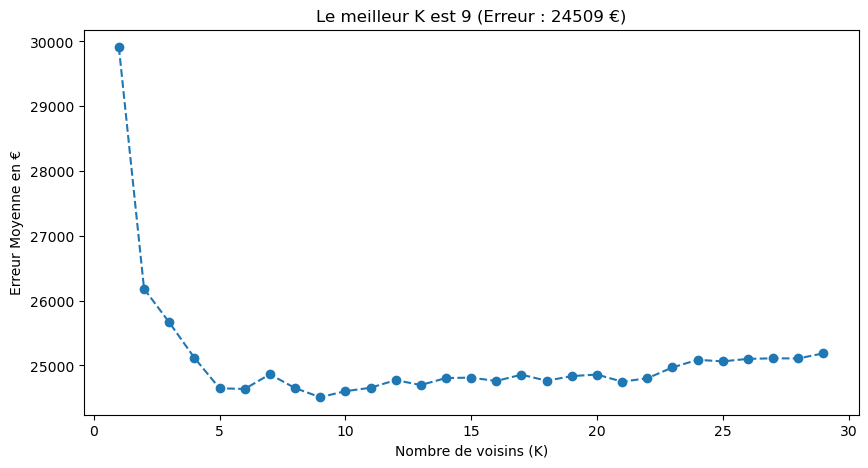

✅ Pour vérifier l'adage, regarde tes 5 à 10 voisins les plus proches.


In [134]:
results_knn = []

print("Optimisation du nombre de voisins en cours...")

for k in range(1, 30):
    # Création et entraînement
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Prédiction
    pred_m2 = knn.predict(X_test_scaled)
    
    # Calcul erreur totale
    prix_total_reel = y_test * X_test['surface_reelle_bati']
    prix_total_predit = pred_m2 * X_test['surface_reelle_bati']
    mae = mean_absolute_error(prix_total_reel, prix_total_predit)
    
    results_knn.append(mae)

# Affichage du meilleur K
meilleur_k = results_knn.index(min(results_knn)) + 1
meilleure_erreur = min(results_knn)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(range(1, 30), results_knn, marker='o', linestyle='--')
plt.xlabel('Nombre de voisins (K)')
plt.ylabel('Erreur Moyenne en €')
plt.title(f'Le meilleur K est {meilleur_k} (Erreur : {meilleure_erreur:.0f} €)')
plt.show()

print(f"✅ Pour vérifier l'adage, regarde tes 5 à 10 voisins les plus proches.")

Clustering terminé ! Voici la carte de tes nouveaux quartiers :


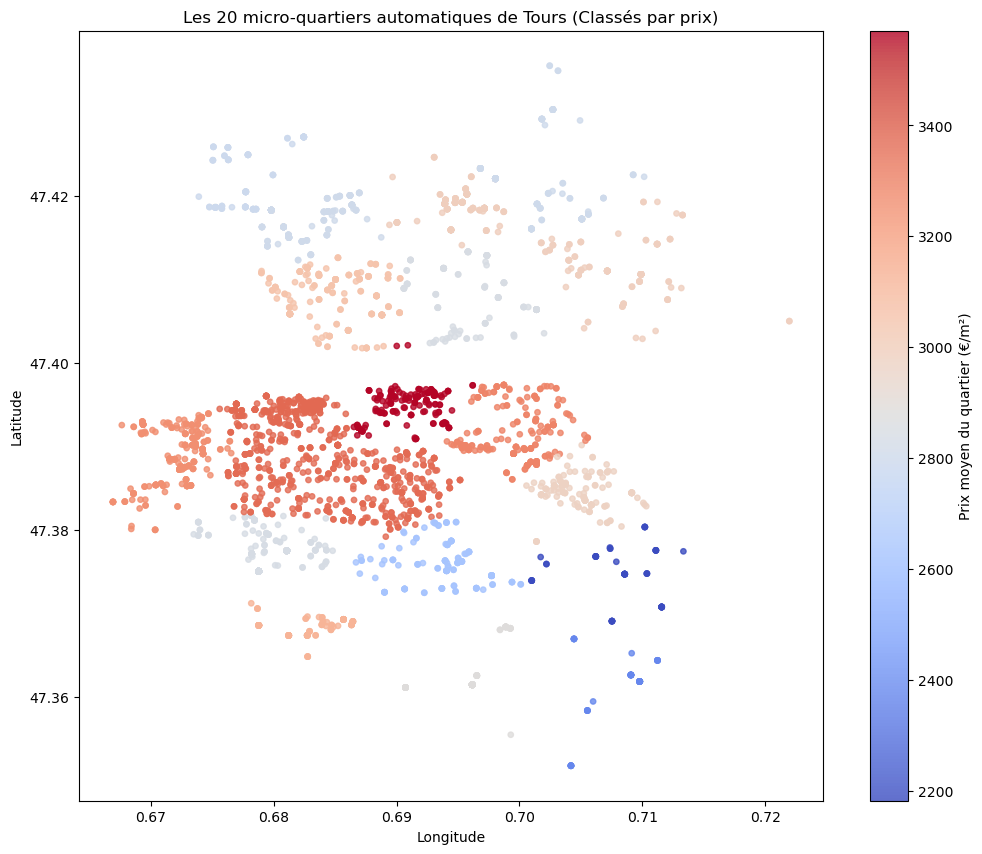

    num_quartier  standing_quartier      prix_m2
8             12        3369.136871  3725.000000
13             8        3372.916228  2719.200000
17            11        2990.676897  2735.294118
18             7        2629.988629  2309.210526
26             7        2629.988629  2361.702128


In [136]:
#clustering K-means
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# --- ÉTAPE 1 : Préparation des données géographiques ---
# On isole uniquement les coordonnées. K-Means n'a besoin que de ça pour créer des zones.
X_geo = dfml1[['latitude', 'longitude']].copy()

# --- ÉTAPE 2 : Configuration de l'algorithme K-Means ---
# n_clusters=20 : Je te propose 20 quartiers pour Tours (c'est plus précis que 15).
# random_state=42 : Pour que les quartiers soient toujours les mêmes à chaque lancement.
kmeans = KMeans(n_clusters=20, random_state=42, n_init=10)

# --- ÉTAPE 3 : Création des "Quartiers Intelligents" ---
# L'algo attribue un numéro (0 à 19) à chaque appartement
dfml1['num_quartier'] = kmeans.fit_predict(X_geo)

# --- ÉTAPE 4 : Calcul du "Standing" du quartier (L'étape CRUCIALE) ---
# Le Random Forest ne sait pas que le quartier "3" est mieux que le "12".
# On va donc remplacer le numéro du quartier par le PRIX MOYEN de ce quartier.
prix_moyen_par_quartier = dfml1.groupby('num_quartier')['prix_m2'].mean()
dfml1['standing_quartier'] = dfml1['num_quartier'].map(prix_moyen_par_quartier)

# --- ÉTAPE 5 : Visualisation ---
print("Clustering terminé ! Voici la carte de tes nouveaux quartiers :")

plt.figure(figsize=(12, 10))
# On colorie les points selon le prix moyen du quartier (standing)
scatter = plt.scatter(dfml1['longitude'], dfml1['latitude'], 
                      c=dfml1['standing_quartier'], cmap='coolwarm', s=15, alpha=0.8)

plt.colorbar(scatter, label='Prix moyen du quartier (€/m²)')
plt.title('Les 20 micro-quartiers automatiques de Tours (Classés par prix)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Affichage des premières lignes pour comprendre
print(dfml1[['num_quartier', 'standing_quartier', 'prix_m2']].head())

In [ ]:
#Création d'un modèle  random forest pour comparer les résultats
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error



dfml2 = df[['surface_reelle_bati', 'nombre_pieces_principales', 'longitude', 'latitude', 'date_mutation', 'valeur_fonciere', 'distance_centre']].copy()
dfml2['standing_quartier'] = dfml1['standing_quartier'] # Ajout du standing du quartier venant du Kmeans
# Date et prix au m²
dfml2['date_mutation'] = pd.to_datetime(dfml2['date_mutation'])
dfml2['date_num'] = dfml2['date_mutation'].apply(lambda x: x.toordinal())
date_ref = dfml2['date_num'].min()
dfml2['date_score'] = dfml2['date_num'] - date_ref
dfml2['prix_m2'] = dfml2['valeur_fonciere'] / dfml2['surface_reelle_bati']

# Filtres
dfml2 = dfml2[(dfml2['prix_m2'] > 1900) & (dfml2['prix_m2'] < 5000)]

# On définit X et Y
X = dfml2[['standing_quartier','surface_reelle_bati', 'nombre_pieces_principales', 'longitude', 'latitude', 'date_score', 'distance_centre']]
y = dfml2['prix_m2']

# Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("L'IA réfléchit (création de 100 arbres de décision)...")

# random_state=42 : Pour avoir toujours le même résultat
modele_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modele_rf.fit(X_train, y_train) #entraînement

pred_m2 = modele_rf.predict(X_test)
erreurmoyenne1 = mean_absolute_error(y_test, pred_m2)   
print(f"Erreur moyenne en euros par m² : {erreurmoyenne1:.2f} €")
print(f"le coefficient R² du modèle : {modele_rf.score(X_test, y_test)}") #évaluation

# B. On remultiplie par la surface pour avoir le PRIX TOTAL
surfaces_test = X_test['surface_reelle_bati'] #c'est maintenant une série pandas
prix_total_predit = pred_m2 * surfaces_test #série pandas du prix total prédit par le modèle rf
prix_total_reel = y_test * surfaces_test #série pandas du prix total réel

# C. Calcul de l'erreur
erreur_finale = mean_absolute_error(prix_total_reel, prix_total_predit)

print("-" * 40)
print(f"RÉSULTAT FINAL :")
print(f"L'erreur moyenne avec Random Forest est de : {erreur_finale:.0f} €")
print("-" * 40)

# Comparaison visuelle rapide
comparison = pd.DataFrame({'Réel': prix_total_reel, 'Prédit': prix_total_predit})
comparison['Différence'] = comparison['Prédit'] - comparison['Réel']
print(comparison.head(5))
#le résultat n'a pas progressé car randomforest avait déjà compris l'importance de l'emplacement via longitude et latitude ainsi pas besoin de faire du Kmeans

L'IA réfléchit (création de 100 arbres de décision)...
Erreur moyenne en euros par m² : 406.11 €
le coefficient R² du modèle : 0.4029134641968053
----------------------------------------
RÉSULTAT FINAL :
L'erreur moyenne avec Random Forest est de : 21713 €
----------------------------------------
           Réel         Prédit    Différence
4794    52000.0   53333.715865   1333.715865
2936   157000.0  158144.436550   1144.436550
12280   92760.0   86502.378869  -6257.621131
7882   210000.0  228678.618680  18678.618680
12210   80000.0   74777.803661  -5222.196339
